In [56]:
import pandas as pd
charts = pd.read_csv('/home/leong/Desktop/Billboard charts/charts.csv')
charts.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [57]:
charts.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

In [58]:
charts = charts.interpolate()

In [59]:
charts.isnull().sum()

date              0
rank              0
song              0
artist            0
last-week         0
peak-rank         0
weeks-on-board    0
dtype: int64

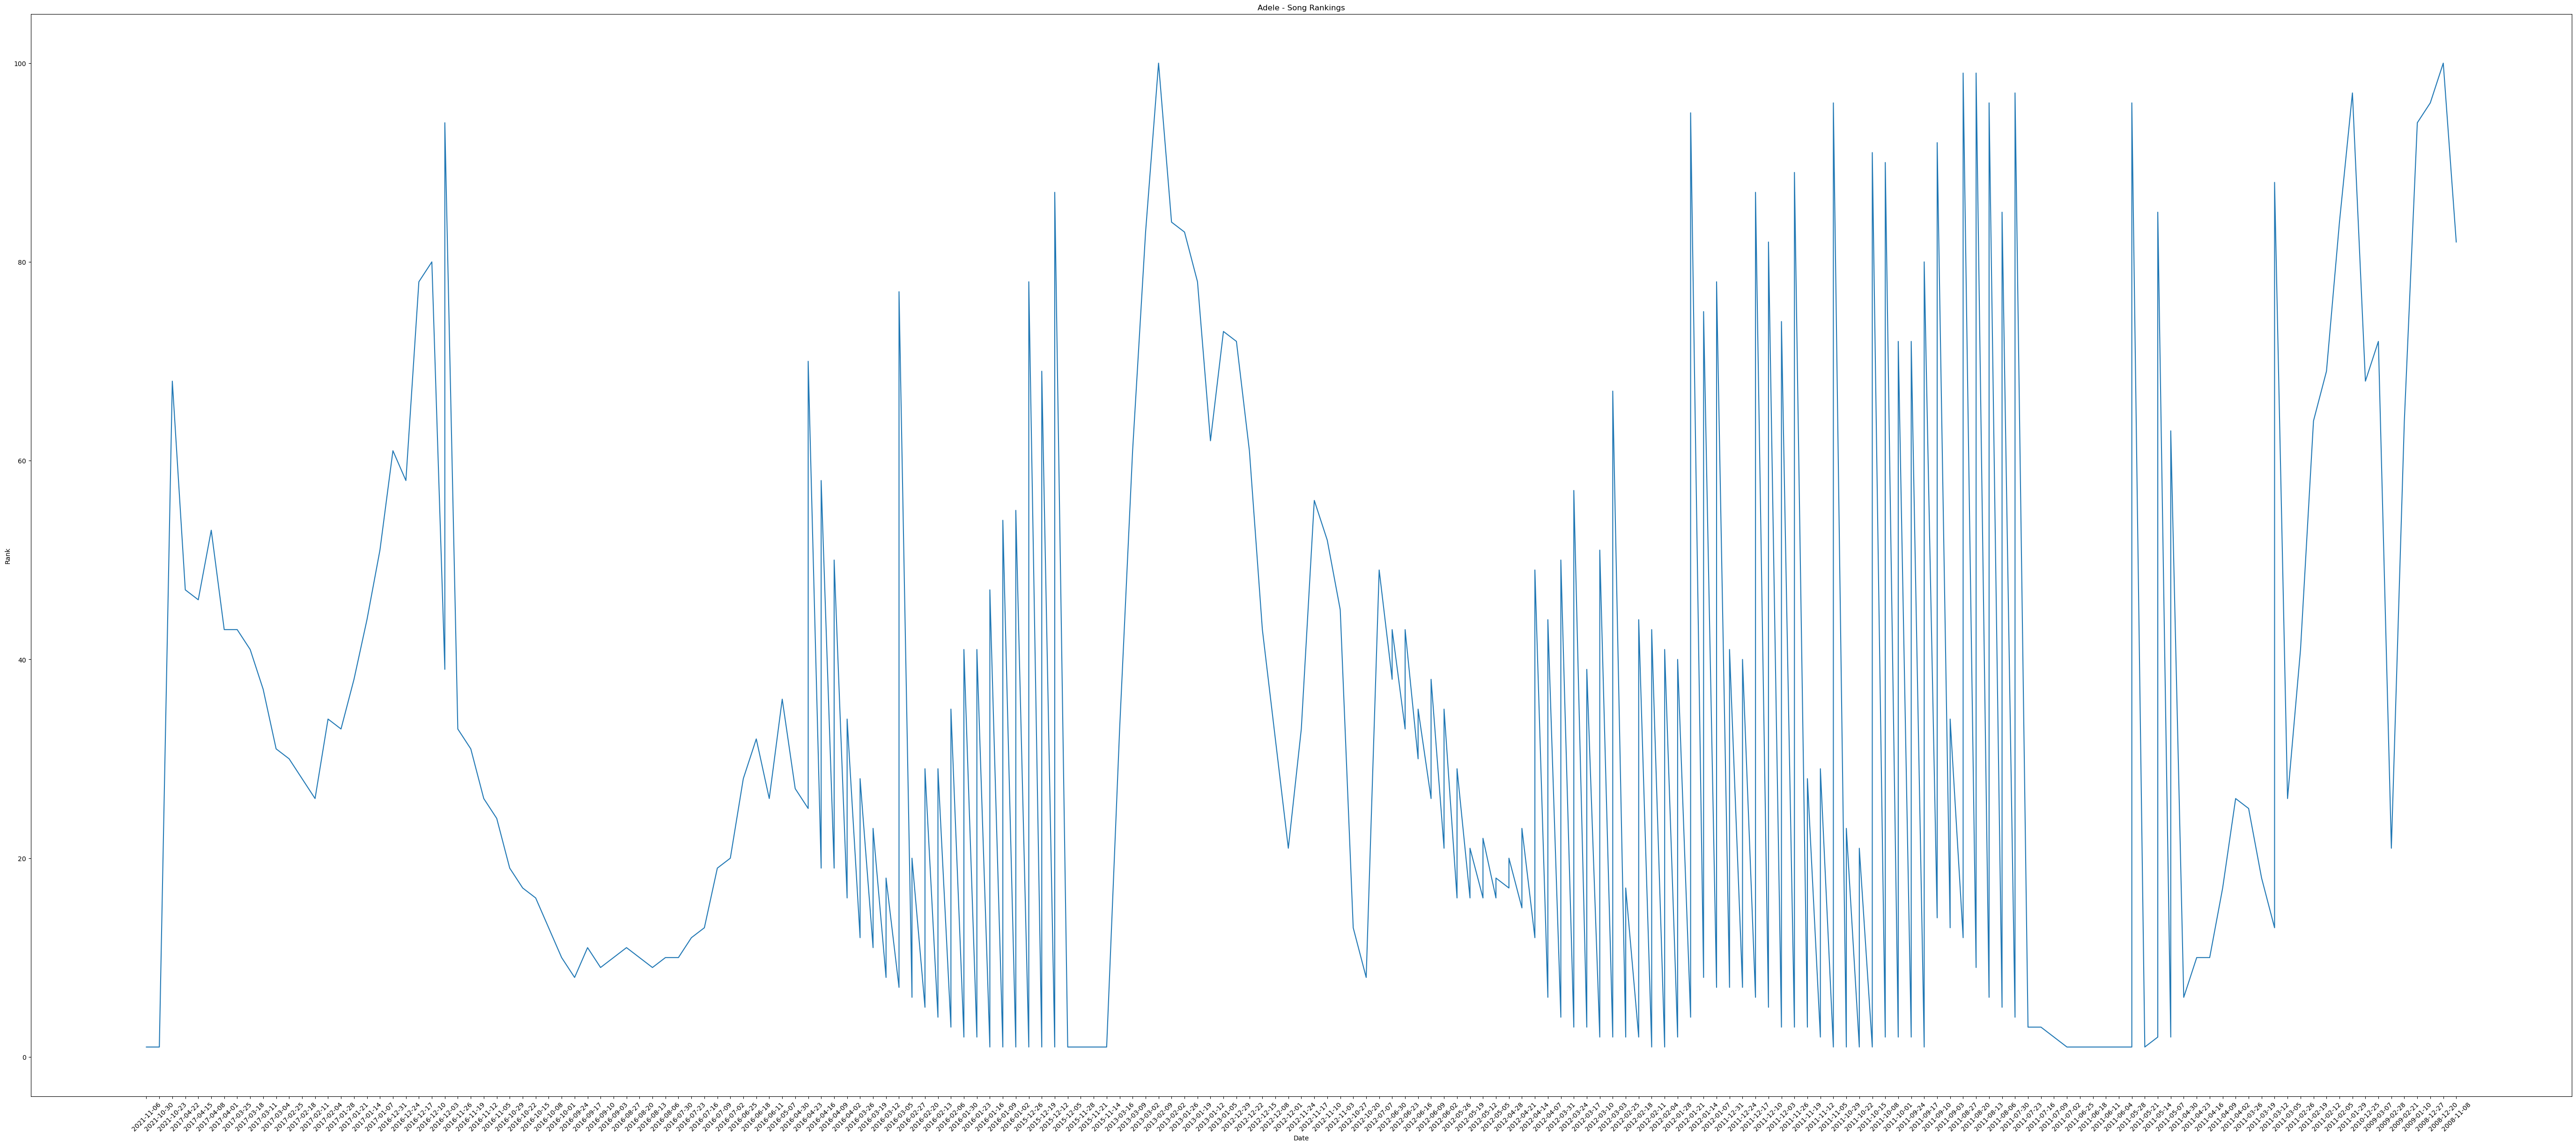

In [60]:
import matplotlib.pyplot as plt
adele_charts = charts[charts['artist'] == 'Adele']
plt.figure(figsize = (70, 30))

plt.plot(adele_charts['date'], adele_charts['rank'])
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Adele - Song Rankings')
plt.xticks(rotation=45)
plt.show()

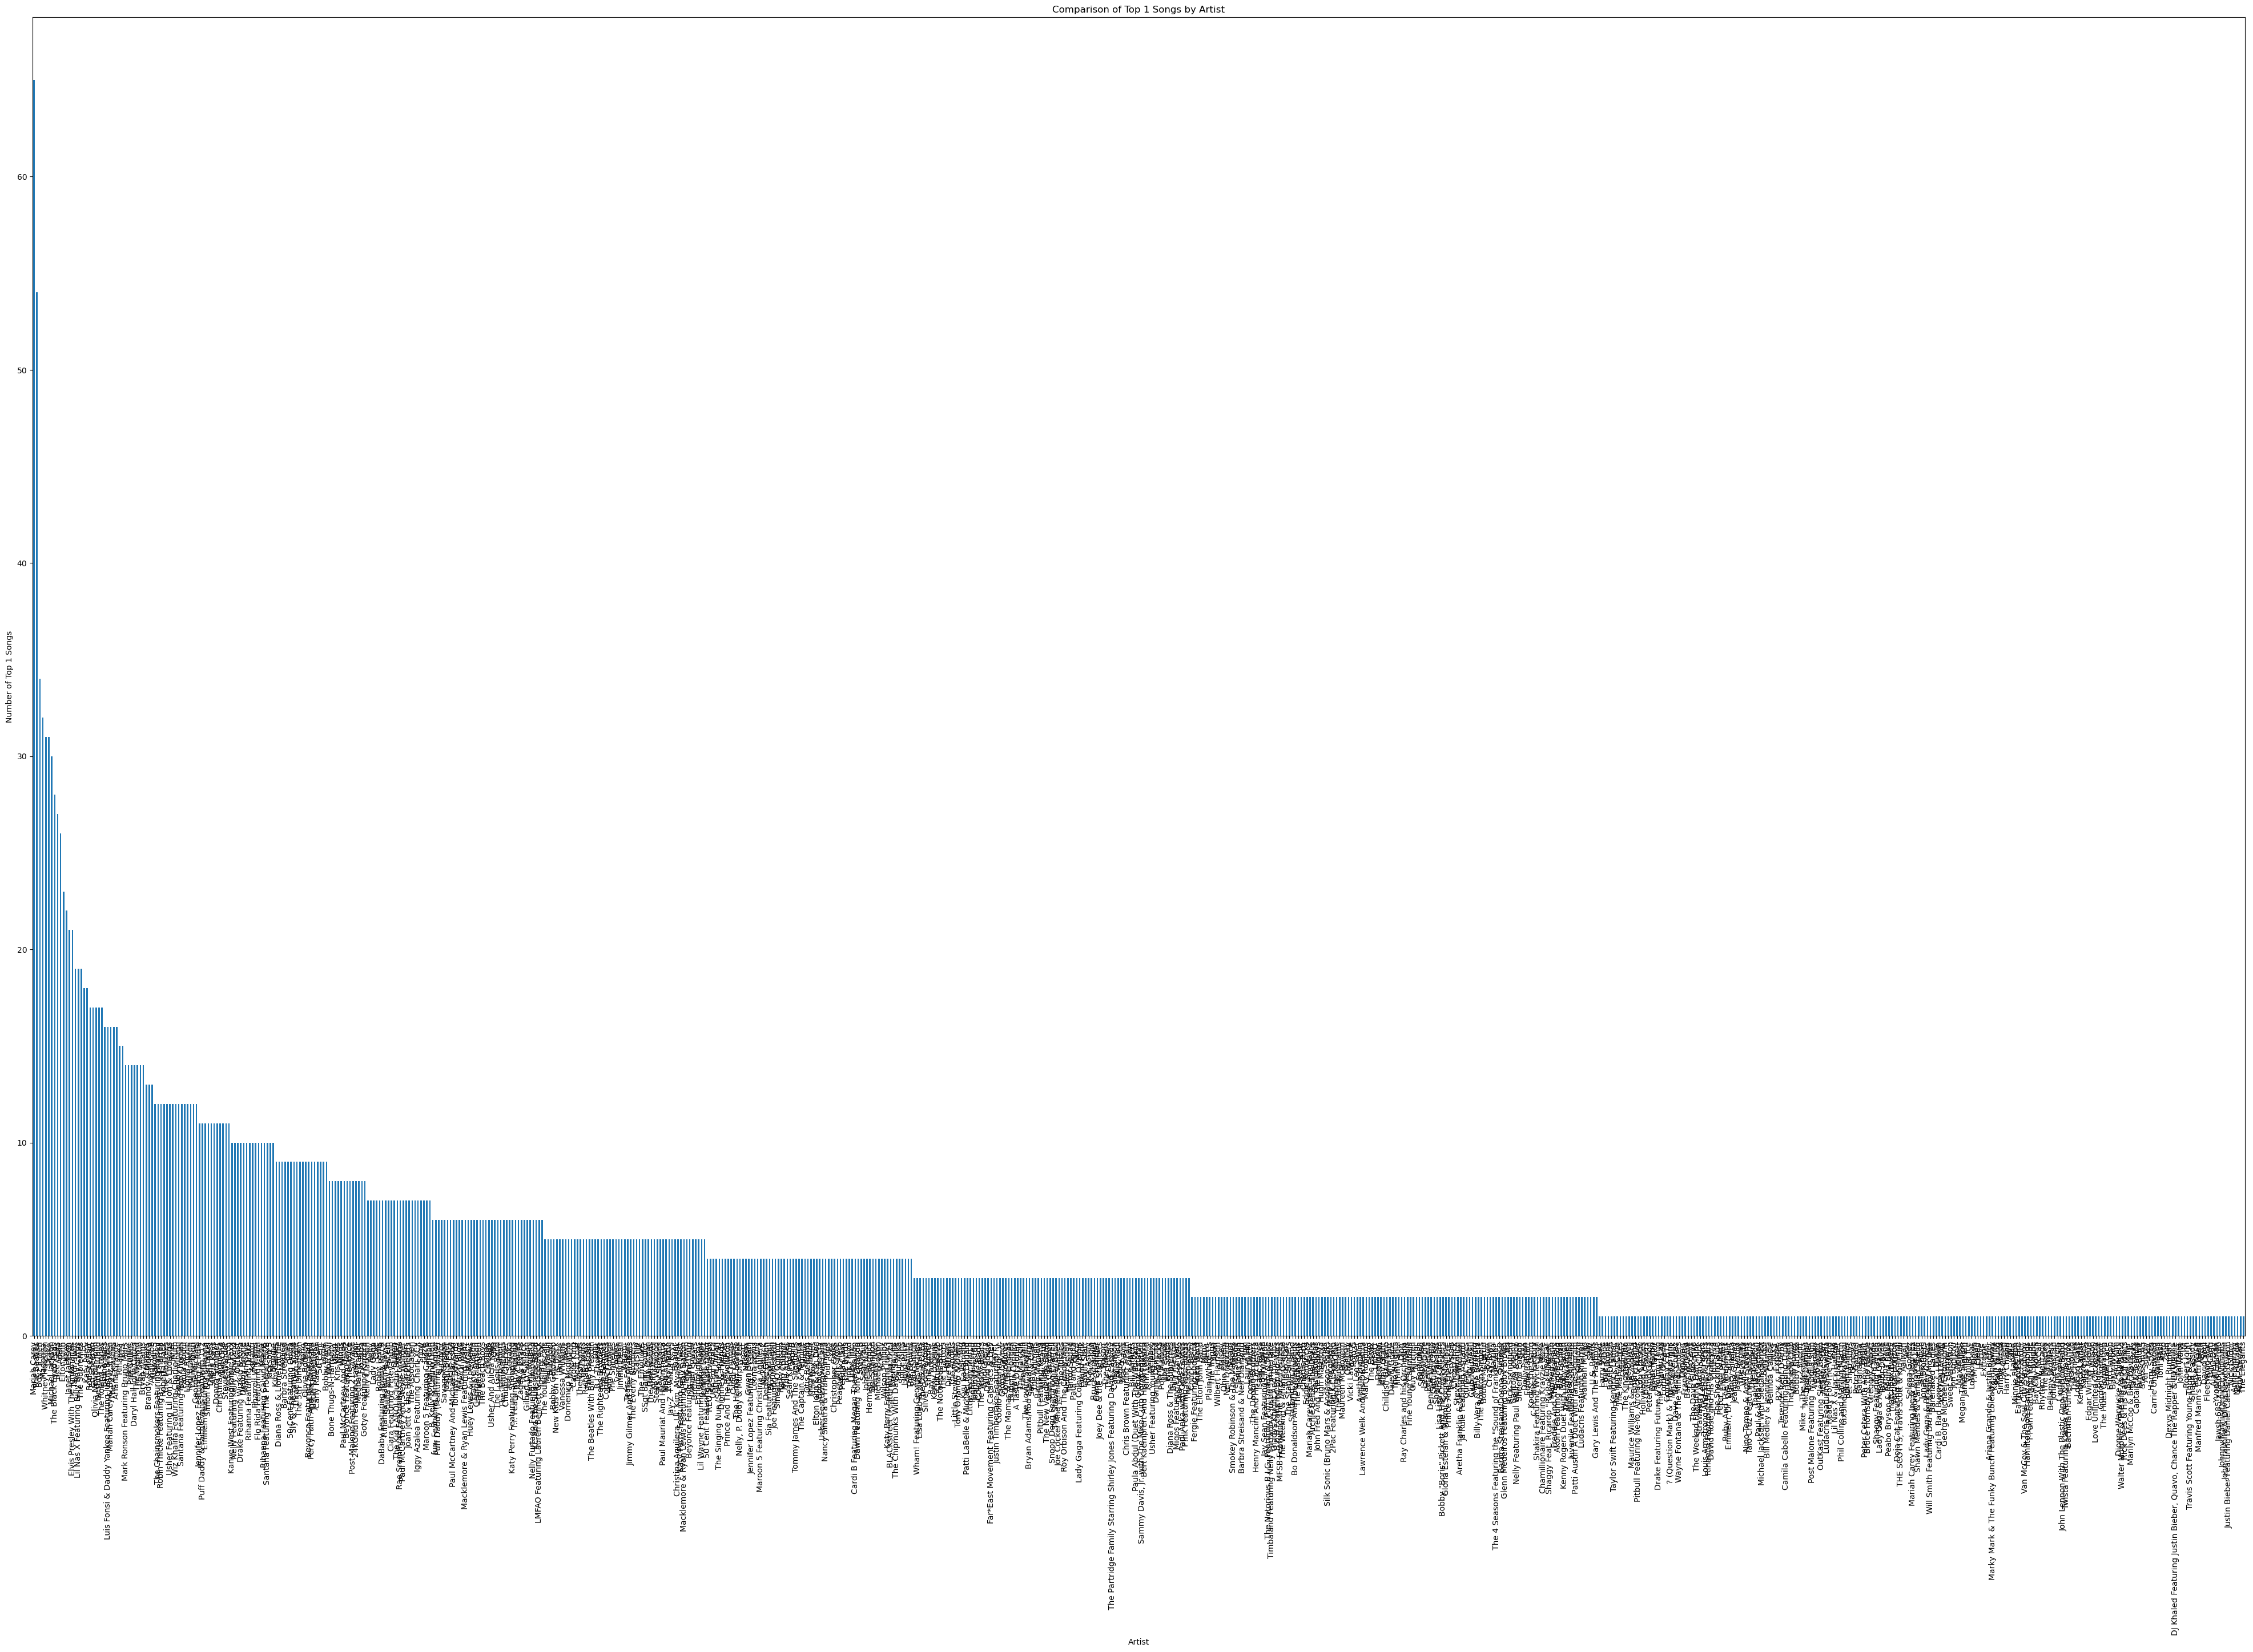

In [61]:
#Comparing the top1 songs
top1_songs = charts[charts['rank'] == 1]

top1_artist_counts = top1_songs['artist'].value_counts()

# Plot a bar chart of the top 1 songs by artist
plt.figure(figsize=(50, 30))
top1_artist_counts.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of Top 1 Songs')
plt.title('Comparison of Top 1 Songs by Artist')
plt.show()

Assessing the best based on performace and I shall have the variables: Top rank songs and longivity on the chart

In [62]:
#Calculating the number of top ranked songs
top_ranked_songs = charts.groupby('artist')['rank'].agg('count').reset_index()

#Calculating the longivity on the chart
longevity_on_chart = charts.groupby('artist')['weeks-on-board'].agg('sum').reset_index()

#overall performance score, giving 60% to top ranked songs and 40% to longivity on the chart board
overall = 0.6 * top_ranked_songs['rank'] + 0.4 * longevity_on_chart['weeks-on-board']
performance = pd.DataFrame({'artist': top_ranked_songs['artist'], 'score': overall})

#ranking the musicians based on the performance score
ranked_performance = performance.sort_values('score', ascending=False)

#priinting the top 10 performers
print("Top performers based on performance:")
print(ranked_performance.head(10))

Top performers based on performance:
               artist   score
8214     Taylor Swift  6089.4
3713  Imagine Dragons  4619.2
9320       The Weeknd  3950.6
5580          Madonna  3870.6
2684       Elton John  3799.4
5642     Mariah Carey  3592.2
5682         Maroon 5  3489.4
2598       Ed Sheeran  3420.6
2473            Drake  3387.0
4739    Kenny Chesney  3361.8


Plotting the best 10 artists and their scores

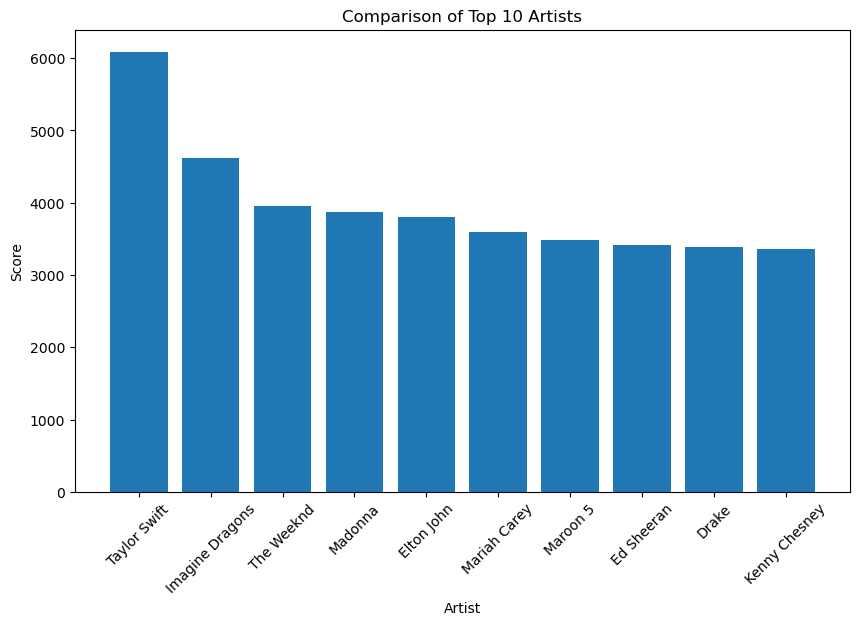

In [63]:
top_10_artists = ranked_performance.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_artists['artist'], top_10_artists['score'])
plt.xlabel("Artist")
plt.ylabel("Score")
plt.title("Comparison of Top 10 Artists")
plt.xticks(rotation=45)
plt.show()

Create a function to print the stats of your fav artists and then plot their first 5 songs

In [64]:
def your_fav(charts):
    name = input("Enter an artist name: ")

    if name in charts['artist'].values:
        artist_stats = charts[charts['artist'] == name]
        print(f"Statistics for {name}:")
        print(artist_stats)
          
        # Plot top 5 songs
        top_songs = artist_stats.sort_values('rank').head(5)
        plt.figure(figsize=(10, 6))
        plt.bar(top_songs['song'], top_songs['rank'])
        plt.xlabel('Song')
        plt.ylabel('Rank')
        plt.title(f"Top 5 Songs by {name}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"The name '{name}' does not exist in the charts.")

your_fav(charts)

The name 'den' does not exist in the charts.
